# The different pictures for linear least squares
When presented with a set of training points and asked to fit a line through it, the canonical approach is to start by defining a suitable error function, such as the sum of squared errors. Then, calculus yields a closed-form least squares solution that minimizes the error. If the data contains *N* input features, the linear model contains *(N + 1)* parameters. The partial derivative of the error function w.r.t. each parameter equals *0*, resulting in a simple linear system that can be quickly solved. This calculus-centric view of least squares is a direct consequence of the way most people picture overconstrained linear systems - as points in an *(N + 1)* dimensional plane.

Let's revisit this picture with an example from the first recorded application of linear (in the parameters) least squares [1]. In the late eighteenth-century, mathematicians were busy trying to fit a linear model to capture the variation in the Earth's curvature. They hypothesized that the length *Δs* of an arc *Δλ* of a meridian at the geodetic latitude *λ* takes on the form:

Δs/Δλ = c₀ + c₁ sin² λ .

Their work used data from a series of French surveys conducted a few years earlier in far-off places, including Lapland and Peru. Here is a table detailing some of the locations, along with a regular 2D plot.

| Location     | Latitude $\lambda$ | $\Delta s/\Delta \lambda$ |
| :---:        | :---:              | :---:                     |
| Peru         | 0                  | 25538.85                  |
| Good Hope    | 37.0093            | 25666.65                  |
| Pennsylvania | 43.5556            | 25599.6                   |
| Italy        | 47.7963            | 25640.55                  |
| France       | 51.3327            | 25658.28                  |
| Austria      | 53.0926            | 25683.3                   |
| Lapland      | 73.7037            | 25832.25                  |
Data collected in French surveys [1] in the early 1700s. All lengths are reported in double toises (1/0.256537 m) and angles in gradians (2π/400)

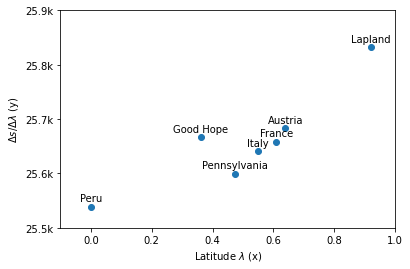

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('survey_data')
x = np.sin(data['latitude'] * np.pi / 180) ** 2
y = data['ratio']

plt.scatter(x, y);
for loc, x_i, y_i in zip(data['location'], x, y):
    plt.annotate(loc, (x_i, y_i + 6), ha='center', va='bottom')

plt.xlim(-.1, 1)
plt.yticks(range(25500, 26000, 100), [f'{l/1000}k' for l in range(25500, 26000, 100)])
plt.xlabel('Latitude $\lambda$ (x)');
plt.ylabel('$\Delta s / \Delta \lambda$ (y)');

[1] Nievergelt, Yves. [A tutorial history of least squares with applications to astronomy and geodesy.](https://www.sciencedirect.com/science/article/pii/S0377042700003435) (2001), Numerical Analysis: Historical Developments in the 20th Century